## Implementação do algoritmo KNN (K-Nearest Neighbors) 
TODO: Comparar holdout e cross-validation

In [22]:
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [23]:
# função calculo distancia
def distancia_euclideana(vet1, vet2):
    distancia = 0
    for i in range(len(vet1)-1):
        distancia += (vet1[i] - vet2[i])**2
    distancia = sqrt(distancia)
    return distancia

# função retorna k vizinhos mais próximos
def retorna_vizinhos(base_treinamento, amostra_teste, num_vizinhos):
    distancias = list()
    for linha_tre in base_treinamento:
        dist = distancia_euclideana(amostra_teste, linha_tre)
        distancias.append((linha_tre, dist)) # erro
    # ordenação das distancias de forma crescente
    distancias.sort(key=lambda tup: tup[1]) # erro
    # retorna os vizinhos mais proximos
    vizinhos = list()
    for i in range(num_vizinhos):
        vizinhos.append(distancias[i][0]) # erro
    return vizinhos

# função de predição/classificação
def classifica(base_treinamento, amostra_teste, num_vizinhos):
    vizinhos = retorna_vizinhos(base_treinamento, amostra_teste, num_vizinhos)
    rotulos = [v[-1] for v in vizinhos]
    predicao = max(set(rotulos), key=rotulos.count)
    return predicao

dataset = [[2.7, 2.5, 0],[1.4, 2.3, 0],[3.3, 4.4, 0],[1.3, 1.8, 0],[3.0, 3.0, 0],[7.6, 2.7, 1],[5.3, 2.0, 1],[6.9, 1.7, 1],[8.6,-0.2, 1],[7.6, 3.5, 1]]
amostra = [0, 0, 0]
predicao = classifica(dataset, amostra, 3)
print('Resultado da clasificação')
print('Esperado %d\nPredição %d' % (amostra[-1], predicao))

Resultado da clasificação
Esperado 0
Predição 0


In [24]:
input_file = 'train.csv'

# Load the data
df = pd.read_csv(input_file)

features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
target = 'price_range'
x = df.loc[:, features].values
y = df.loc[:, target].values

# x_minmax = MinMaxScaler().fit_transform(x)
# normalized_minmax = pd.DataFrame(x_minmax, columns = features)
# normalized_minmax = pd.concat([normalized_minmax, df[[target]]], axis = 1)

In [25]:
# Create stratified k-fold cross-validation
sk_folds = StratifiedKFold(n_splits = 10)

# Create the model K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=21)

scores = cross_val_score(knn, x, y, cv=sk_folds)
# use cross_val_predict
y_pred_cv = cross_val_predict(knn, x, y, cv=sk_folds)


print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

print("Accuracy: ", accuracy_score(y, y_pred_cv))
print("F1 Score: ", f1_score(y, y_pred_cv, average='weighted'))
print("Confusion Matrix: \n", confusion_matrix(y, y_pred_cv))


Cross Validation Scores:  [0.92  0.935 0.95  0.935 0.935 0.935 0.955 0.92  0.93  0.925]
Average CV Score:  0.9340000000000002
Number of CV Scores used in Average:  10
Accuracy: 0.93 (+/- 0.02)
Accuracy:  0.934
F1 Score:  0.9338576599596663
Confusion Matrix: 
 [[489  11   0   0]
 [ 22 458  20   0]
 [  0  30 447  23]
 [  0   0  26 474]]


In [26]:
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

Average Accuracy: 93.40%
Average F1 Score: 93.39%
Average Precision: 93.48%
Average Recall: 93.40%
Average Specificity: 97.80%
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       500
           1       0.92      0.94      0.93       500
           2       0.92      0.92      0.92       500
           3       0.97      0.95      0.96       500

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



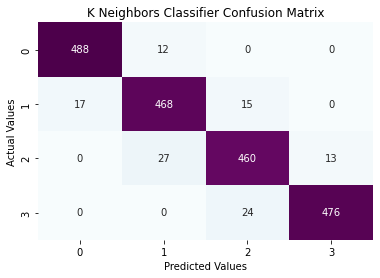

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       500
           1       0.92      0.92      0.92       500
           2       0.91      0.89      0.90       500
           3       0.95      0.95      0.95       500

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



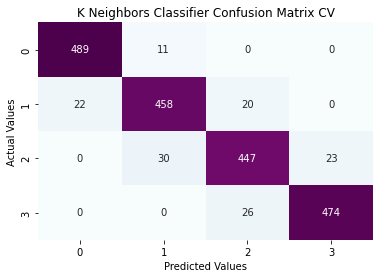

In [27]:

acc_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []

conf_matrices = []

# Normalize the data
x_minmax = MinMaxScaler().fit_transform(x)
# print(x_minmax)
# normalized_minmax = pd.DataFrame(x_minmax, columns = features)
# normalized_minmax = pd.concat([normalized_minmax, df[[target]]], axis = 1)

for train_index, test_index in sk_folds.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    conf_matrices.append(cm)
    
    # Compute accuracy, F1 score, precision, recall (sensitivity), and specificity
    acc = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    recall = np.diag(cm) / np.sum(cm, axis = 1)
    specificity = [np.sum(np.delete(np.delete(cm, i, 0), i, 1)) / (np.sum(np.delete(cm, i, 0))) for i in range(len(cm))]
    
    acc_scores.append(acc)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    specificity_scores.append(specificity)

# Average the scores
average_accuracy = np.mean(acc_scores)
average_f1_score = np.mean(f1_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_specificity = np.mean(specificity_scores)

# Fit the model without cross-validation
y_pred = knn.predict(x)

print(f"Average Accuracy: {average_accuracy*100:.2f}%")
print(f"Average F1 Score: {average_f1_score*100:.2f}%")
print(f"Average Precision: {average_precision*100:.2f}%")
print(f"Average Recall: {average_recall*100:.2f}%")
print(f"Average Specificity: {average_specificity*100:.2f}%")

cm_rfc=my_confusion_matrix(y, y_pred, 'K Neighbors Classifier Confusion Matrix')
cm_rfc_cv = my_confusion_matrix(y, y_pred_cv, 'K Neighbors Classifier Confusion Matrix CV')

Normalized confusion matrix
[[0.978 0.022 0.    0.   ]
 [0.044 0.916 0.04  0.   ]
 [0.    0.06  0.894 0.046]
 [0.    0.    0.052 0.948]]


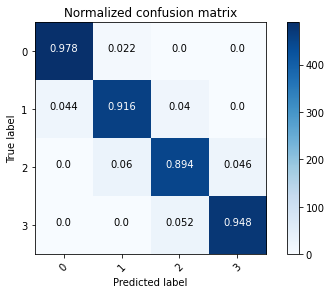

Normalized confusion matrix
[[0.978 0.022 0.    0.   ]
 [0.044 0.916 0.04  0.   ]
 [0.    0.06  0.894 0.046]
 [0.    0.    0.052 0.948]]


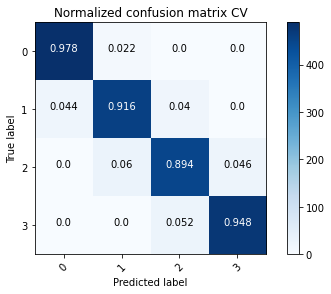

Normalized confusion matrix
[[0.976 0.024 0.    0.   ]
 [0.034 0.936 0.03  0.   ]
 [0.    0.054 0.92  0.026]
 [0.    0.    0.048 0.952]]


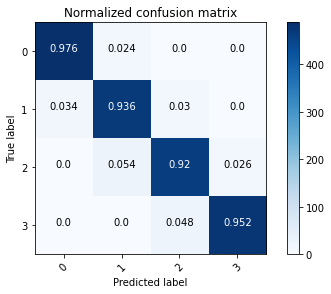

In [28]:

"""
This function prints and plots the confusion matrix.
Normalization can be applied by setting `normalize=True`.
"""
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    
    
plot_confusion_matrix(np.sum(conf_matrices, axis=0), classes=[0, 1, 2, 3], normalize=True, title='Normalized confusion matrix')
plt.show()
# plot with cv
plot_confusion_matrix(cm_rfc_cv, classes=[0, 1, 2, 3], normalize=True, title='Normalized confusion matrix CV')
plt.show()
#plot without cv
plot_confusion_matrix(cm_rfc, classes=[0, 1, 2, 3], normalize=True, title='Normalized confusion matrix')